In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv(r'C:\Users\acer\Downloads/hotel_bookings.csv')

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [10]:
df.shape

(119390, 32)

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.fillna(0,inplace=True)

In [13]:
df.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [14]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [15]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [16]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

### Visualise Entire Dataframe where adult,children & babies are 0

In [17]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [18]:
df=df[~filter]

In [28]:
df.hotel.value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [27]:
resort=df[((df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0 ))]

In [29]:
city=df[(df['hotel']=='City Hotel') & df['is_canceled']==0]

### Where do the guests come from?

In [34]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as ex

In [35]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()

In [43]:
x=go.Bar(x=labels,y=values)

In [44]:
iplot([x])

In [65]:
country_wise_data=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']

In [66]:
country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,MRT,1
163,ASM,1
164,NPL,1


In [67]:
map_guest = ex.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")

In [68]:
map_guest.show()

### People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

In [70]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [74]:
data2=df[df['is_canceled']==0]

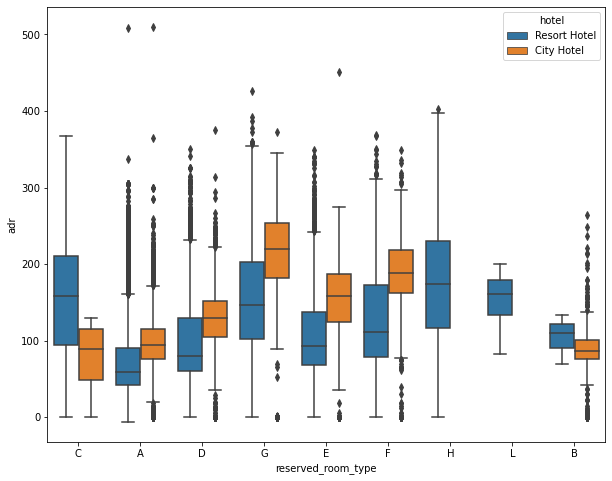

In [79]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data2['reserved_room_type'],y=data2['adr'],data=data2,hue='hotel')

In [82]:
data_resort=resort[resort['is_canceled']==0]

In [83]:
data_city=city[city['is_canceled']==0]

In [84]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [85]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [89]:
final=pd.merge(resort_hotel,city_hotel,on='arrival_date_month')

In [92]:
final['month_num']=final.arrival_date_month.map({"April":4,"August":8,"December":12,"February":2,"January":1,"July":7,"June":6,"March":3,"May":5,"November":
                             11,"October":8,"September":9})

In [95]:
final=final.sort_values(by='month_num')

In [98]:
final.drop(['month_num'],inplace=True,axis=1)

In [106]:
final=final.reset_index()

In [108]:
final.drop(['index'],axis=1,inplace=True)

In [110]:
final

,arrival_date_month,adr_x,adr_y
0,January,48.761125,67.108296
1,February,54.147478,72.577923
2,March,57.056838,77.608690
3,April,75.867816,97.931649
4,May,76.657558,104.962224
5,June,107.974850,114.721068
6,July,150.122528,129.427889
7,August,181.205892,142.290603
8,October,61.775449,86.993768
9,September,96.416860,107.390813


In [114]:
ex.line(final, x='arrival_date_month', y=['adr_x','adr_y'], title='Room price per night over the Months')

### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn

### Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

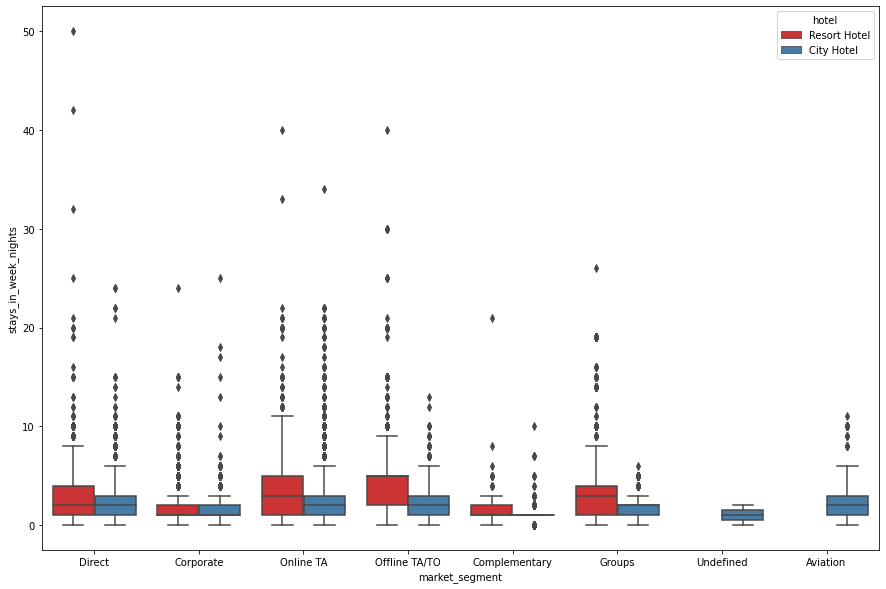

In [126]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'Set1');

### Analysing Preference of Guests, what they basically Prefer?

In [137]:
x=go.Pie(labels=df['meal'].value_counts().index,values=df['meal'].value_counts())

In [138]:
iplot([x])

### There is a big difference in the Bed & Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

## Analyse Special Request done by Customers

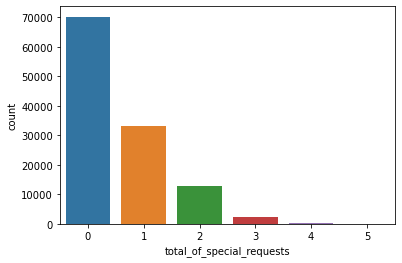

In [140]:
sns.countplot(x='total_of_special_requests',data=df,)

### Around 55% of bookings do not have any special requests


In [142]:
pivot=df.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

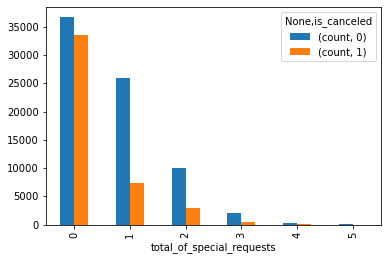

In [143]:
pivot.plot(kind='bar')

### This graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.


## Which are the most busy month or in which months Guests are high?

In [146]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [153]:
rush_city=data_city.arrival_date_month.value_counts().reset_index()

In [154]:
rush_city

,index,arrival_date_month
0,August,8624
1,July,7907
2,May,7103
3,October,6901
4,March,6620
5,April,6560
6,June,6395
7,September,6385
8,February,5359
9,November,4651


In [155]:
rush_resort=data_resort.arrival_date_month.value_counts().reset_index()

In [156]:
rush_resort

,index,arrival_date_month
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [234]:
final_rush=pd.merge(rush_resort,rush_city,on='index')

In [235]:
final_rush

,index,arrival_date_month_x,arrival_date_month_y
0,August,3257,8624
1,July,3137,7907
2,October,2575,6901
3,March,2571,6620
4,April,2550,6560
5,May,2535,7103
6,February,2308,5359
7,September,2102,6385
8,June,2037,6395
9,December,2014,4391


In [236]:
final_rush.columns=['month','arrival_resort_guests','arrival_city_guests']

In [237]:
final_rush

,month,arrival_resort_guests,arrival_city_guests
0,August,3257,8624
1,July,3137,7907
2,October,2575,6901
3,March,2571,6620
4,April,2550,6560
5,May,2535,7103
6,February,2308,5359
7,September,2102,6385
8,June,2037,6395
9,December,2014,4391


In [238]:
!pip install sort-dataframeby-monthorweek

In [239]:
!pip install sorted-months-weekdays

In [240]:
import sort_dataframeby_monthorweek as sd

In [242]:
final_rush2=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush2

,month,arrival_resort_guests,arrival_city_guests
0,January,1866,4115
1,February,2308,5359
2,March,2571,6620
3,April,2550,6560
4,May,2535,7103
5,June,2037,6395
6,July,3137,7907
7,August,3257,8624
8,September,2102,6385
9,October,2575,6901


In [243]:
ex.line(data_frame=final_rush2, x='month', y=['arrival_resort_guests','arrival_city_guests'], title='Total no of guests per Months')

###  The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.
 
Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

In [245]:
filter=df['is_canceled']==0
clean_data=df[filter]

In [246]:
clean_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [248]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

<ipython-input-248-1f0b759752e5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [249]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [254]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]

In [255]:
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [256]:
stay=stay.rename(columns={"is_canceled":"no_of_stays"})

In [257]:
stay

,total_nights,hotel,no_of_stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


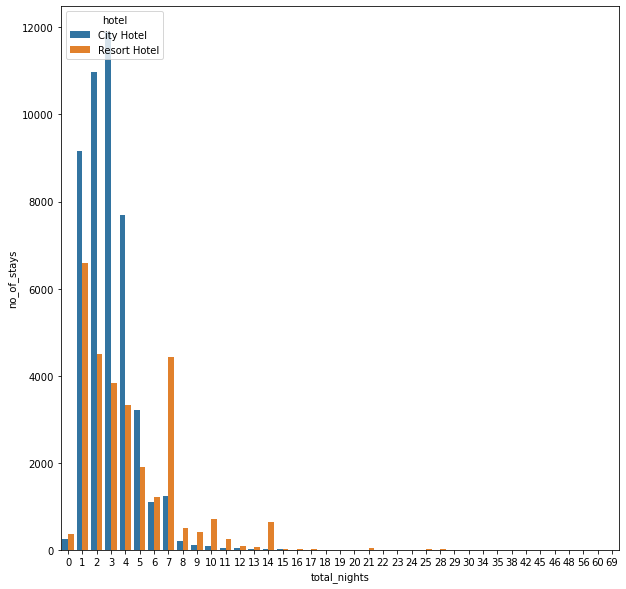

In [262]:
plt.figure(figsize=(10,10))
sns.barplot(x='total_nights',y='no_of_stays',hue='hotel',hue_order = ["City Hotel", "Resort Hotel"],data=stay)

### Bookings by market segment

In [263]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [265]:
ex.pie(clean_data,names=clean_data['market_segment'].value_counts().index,values=clean_data['market_segment'].value_counts())

### Almost half of the bookings are dominated by Online TA

## To analyse how many bookings were cancelled

In [273]:
cancel=df[df['is_canceled']==1]

In [274]:
rh_cancellations = cancel[cancel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancellations = cancel[cancel["hotel"] == "City Hotel"]["is_canceled"].sum()

In [275]:
rh_cancellations

11120

In [276]:
ch_cancellations

33079

In [277]:
ex.pie(values=[11120,33079],names=[rh_cancellations,ch_cancellations])

In [279]:
cancellation=df[df['is_canceled']==1]
cancellation.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [280]:
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [281]:
cancel_month=df.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

In [282]:
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [283]:
final=sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,3730
1,January,Resort Hotel,2191
2,February,City Hotel,4950
3,February,Resort Hotel,3102
4,March,City Hotel,6434
5,March,Resort Hotel,3334
6,April,City Hotel,7469
7,April,Resort Hotel,3609
8,May,City Hotel,8221
9,May,Resort Hotel,3559


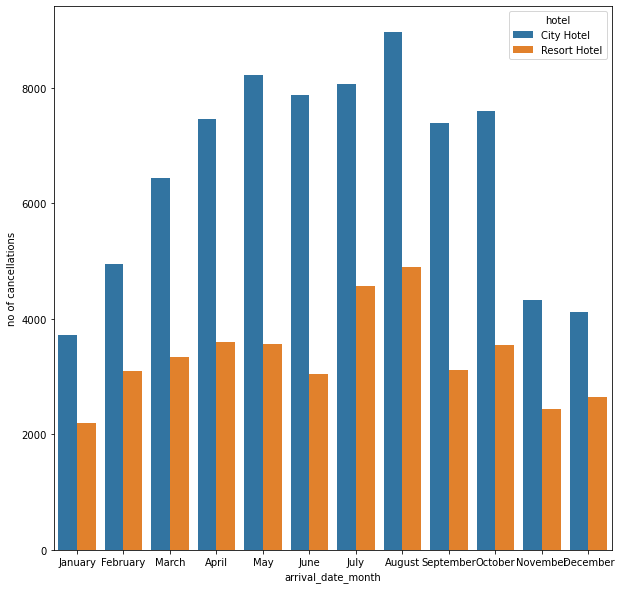

In [286]:
plt.figure(figsize=(10,10))
sns.barplot(x='arrival_date_month',y='no of cancellations',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=final)

### For the City hotel the relative number of cancelations is around 40 % throughout the year.For the Resort hotel it is highest in the summer and lowest during the winter.